<a href="https://colab.research.google.com/github/Aldistwn29/ProjectDS/blob/main/Python_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Implementasi Linear Regression

# Deep Dive Case Sales Revuene Forcasting

# import library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Simple Linear Regression

# Membuat dataset

In [ ]:
df_simple = pd.read_csv('Advertising.csv', usecols=['TV','Sales'])

In [ ]:
df_simple.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [ ]:
df_simple.shape

(200, 2)

In [ ]:
df_simple.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [ ]:
df_simple.isnull().sum()

TV       0
Sales    0
dtype: int64

In [ ]:
lr = LinearRegression()

In [ ]:
x = df_simple[['TV']]
y = df_simple[['Sales']]

# Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=42)

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

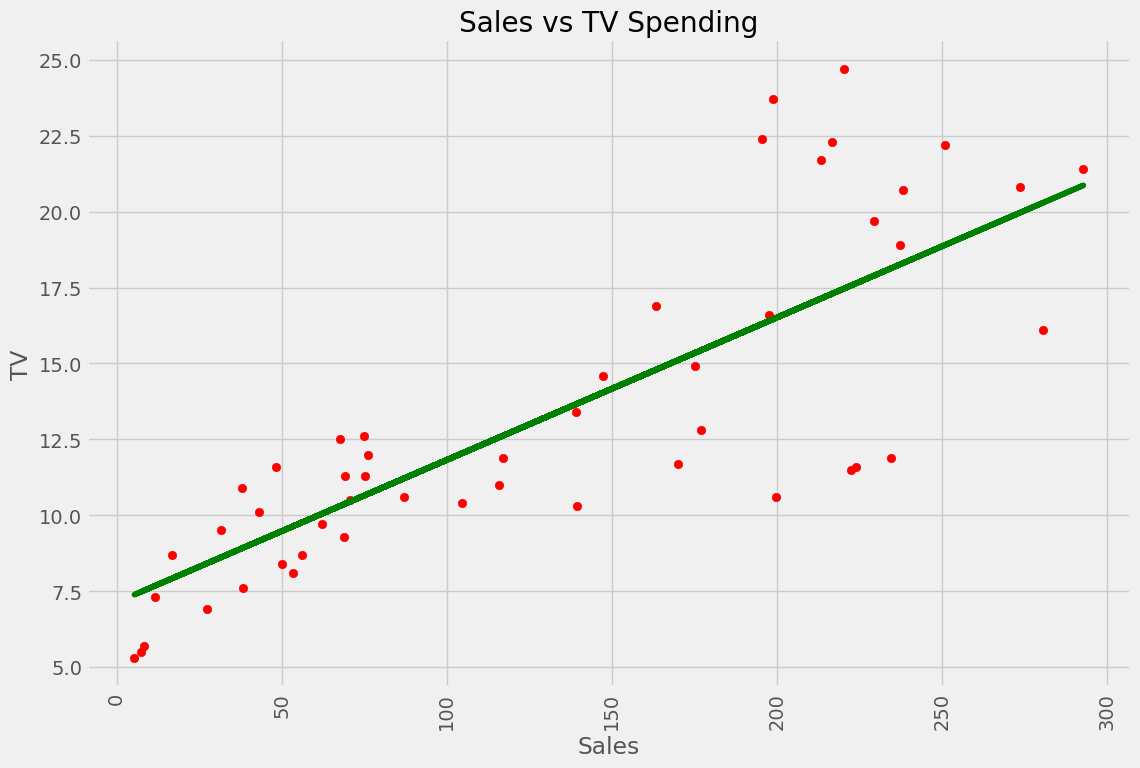

In [ ]:
plt.scatter(x_test, y_test, color= "red")
plt.plot(x_test, lr.predict(x_test), color= "green")
plt.title("Sales vs TV Spending")
plt.xlabel("Sales")
plt.ylabel("TV")
plt.xticks(rotation=90)
plt.show()

# R Squared Score

In [ ]:
print("R2 score is: ", round(r2_score(y_test,y_pred),3)*100, "%")

R2 score is:  66.10000000000001 %


# Simple Linear Regression Formula : y = b0 + b1 * x1

model regression linear sebenarnya merupakan rumus linear dalam bentuk y = b0 + b1*x1; dimana y merupakan keluaran atau outcome, dan x1 merupakan variable independen (predictor), juga b1 adalah kemiringan garis; juga dikenal sebagai koefisien regresi dan b0 adalah intersep yang diberi label konstan.



# Finding Intercept and Coefficient

In [ ]:
lr.intercept_

array([7.13178451])

In [ ]:
lr.coef_[0]

array([0.04689446])

* Let's find out sales number if we spend 300 $ on TV advertising

# by using our Simple Linear Regression

In [ ]:
prediction = lr.predict([[300]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
round_prediction = round(float(prediction),2)

In [ ]:
print("Prediction Sales: ", round_prediction)

Prediction Sales:  21.2


# by using ıntercept and coefficient

Recall the equation is y = b_0 + b_1 * x1

Let's put each value into the equationm

In [ ]:
y = lr.intercept_ + lr.coef_ * 300
round_prediction = round(float(y),2)

In [ ]:
print("Prediction Sales: ", round_prediction)

Prediction Sales:  21.2


* We see the same value as you can see above . Linear regression does the same job for each observation.

# Multiple Linear Regression

In [ ]:
df_multiple = pd.read_csv('Advertising.csv')

df_multiple.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df_multiple.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Missing Values

In [ ]:
df_multiple.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
X = df_multiple[["TV", "Radio","Newspaper"]]
Y = df_multiple["Sales"]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,Y_train)

LinearRegression()

# Interpretasi Hasil dengan Adjusted R Squared

* Kita sudah tahu bagaimana R Squared dapat membantu kita dalam Evaluasi Model. Namun, ada satu kelemahan utama menggunakan R Squared. Nilai R Squared tidak pernah berkurang. Jika Anda bertanya-tanya mengapa perlu dikurangi karena hanya akan menghasilkan model yang buruk, menambahkan variabel independen baru akan menghasilkan peningkatan nilai R Squared. Ini adalah aliran utama karena R Squared akan menyarankan bahwa menambahkan variabel baru terlepas dari apakah mereka benar-benar signifikan atau tidak, akan meningkatkan nilainya.

In [ ]:
Y_pred = lr.predict(X_test)

In [ ]:
r_squared = r2_score(Y_test, Y_pred)

In [ ]:
adjusted_r_squared = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)

In [ ]:
print('Adjusted R Squared: %',round(adjusted_r_squared*100,2), 'R Squared: %',round(r_squared*100,2))

Adjusted R Squared: % 89.19 R Squared: % 89.35


Rumus Multiple Linear Regression : **y = b0 + b1 * x1 + b2 * x2 + b3 * x3**

In [ ]:
print("Intercept is: ",lr.intercept_,"and Coefficients are", lr.coef_)

Intercept is:  2.778303460245283 and Coefficients are [0.04543356 0.19145654 0.00256809]


In [ ]:
lr.coef_

array([0.04543356, 0.19145654, 0.00256809])

* Koefisien TV :**0.05444578**
* Koefisien Radio : **0.10700123**
* Koefisien Newspaper : **0.00033566**


# Menggunakan Linear Regression kira

In [ ]:
round(lr.predict([[200,50,20]])[0],2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


21.49

# Menggunakan coefficient dan intercept LR

In [ ]:
y = lr.intercept_ + lr.coef_[0] * 200 + lr.coef_[1] * 50 + lr.coef_[2] * 20

In [ ]:
round(y,2)

21.49

# Linear Regression from scratch

In [ ]:
# Importing libraries

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as pl

# Linear Regression
class LinearRegression():

  def __init__(self, learning_rate, iterations):

    self.learning_rat = learning_rate
    self.iterations = iterations

  # Function for model training
  def fit(self, X, Y):

    # no_of_training_examples, no_of_features

    self.m, self.n = X.shape

    # weight initialization

    self.W = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # gradient desecent learning
    for i in range(self.iterations):

      self.update_weights()

    return self

    # Helper function to update weights in gradient desenct

    def update_weights(self):

      Y_pred = self.predict(self.X)

      # calculate gradients
      dW = -(2 *(self.X.T).dot(self.Y - Y_pred)) / self.m

      db = - 2 * np.sum(self.Y - Y_pred) / self.m

      # update weights

      self.W = self.W - self.learning_rate * dW
      self.b = self.b - self.learning_rate * db

      return self

    # Hypothetical function h(x)
    def predict(self, X):

      return X.dot(self.W) + self.b